## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [27]:
#import all librarys and modules needed

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

alice_txt = "https://raw.githubusercontent.com/e3la/DataVisualizationPython/main/Data/Alice.txt"
imagine_txt = "https://raw.githubusercontent.com/e3la/DataVisualizationPython/main/Data/Imagine.txt"
canada_xlsx = "https://github.com/e3la/DataVisualizationPython/raw/main/Data/Canada.xlsx"


### Step-2 : Importing and Cleaning Data

In [28]:
#import and clean data, remember path is data/Canada.xlsx


df = pd.read_excel(canada_xlsx,1, skiprows = range(20), skipfooter = 2)

df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)
df['total'] = df.sum(axis = 1)
df = df.set_index('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
df.columns = df.columns.astype(str)
# Useful for upcoming visualizations
years = list(map(str, range(1980,2013)))


<ipython-input-28-be4f0fa78aed>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis = 1)


### Step-3 : Creating Beautiful Visualizations

#### Line Chart

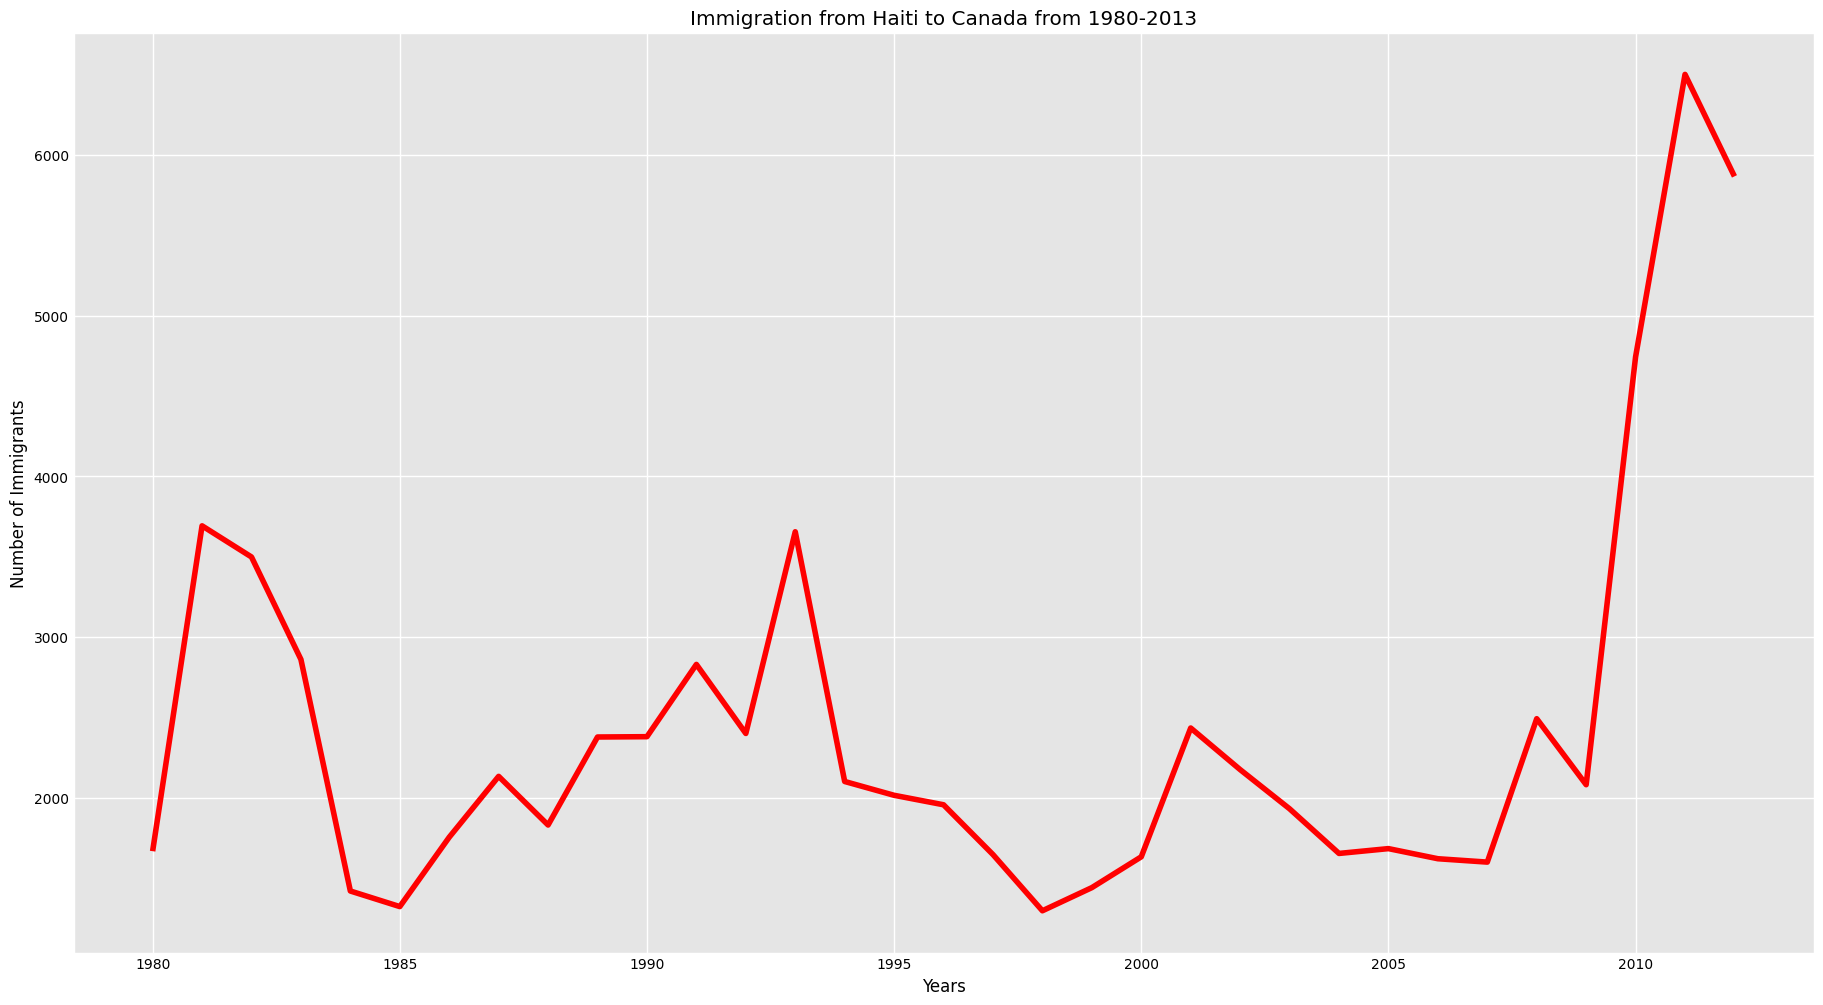

In [29]:
# Single line chart

fig1 = df.loc['Haiti', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Haiti to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')
plt.style.use('grayscale')



plt.show()



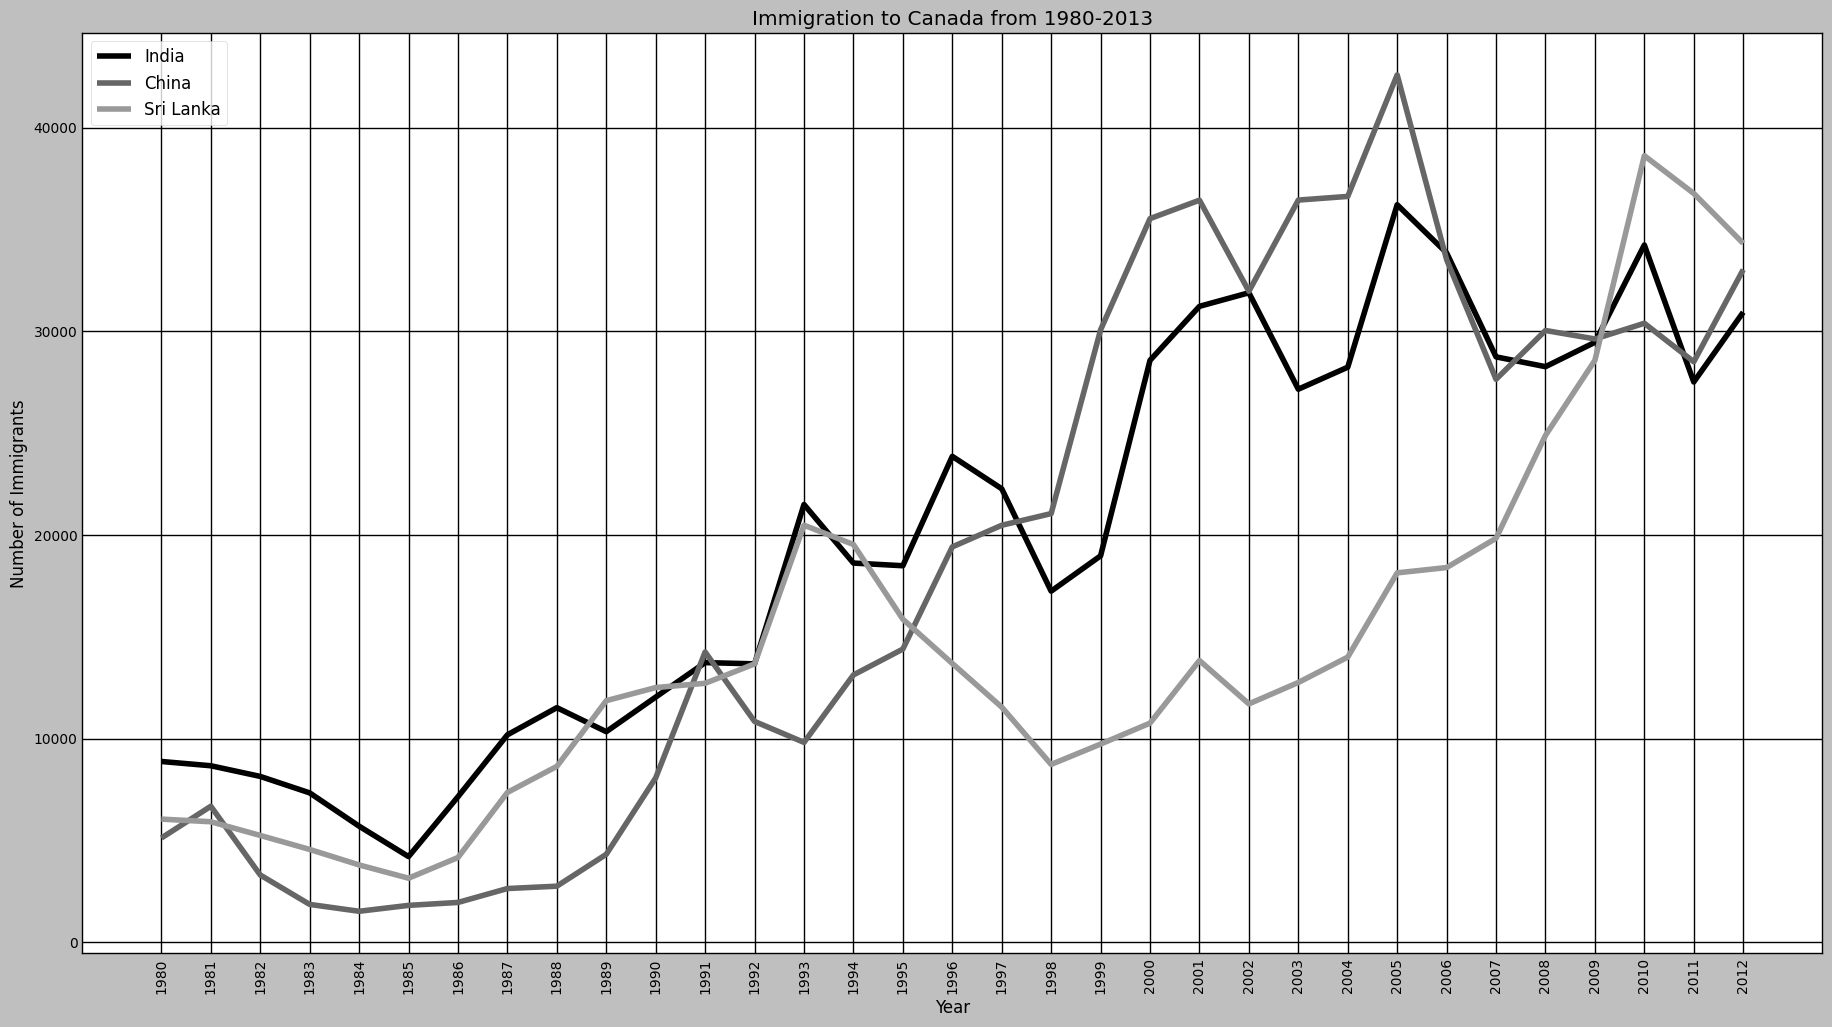

In [30]:
# Multiple Line chart

fig2 = plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
#plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')
plt.style.use('grayscale')


plt.show()

#### Lets talk about style   

In [31]:
#Shows all avaiable built-in styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Syntex to select a specific style is: plt.style.use('style_name')

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br><br><br>

- answer - The legend books moves

Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

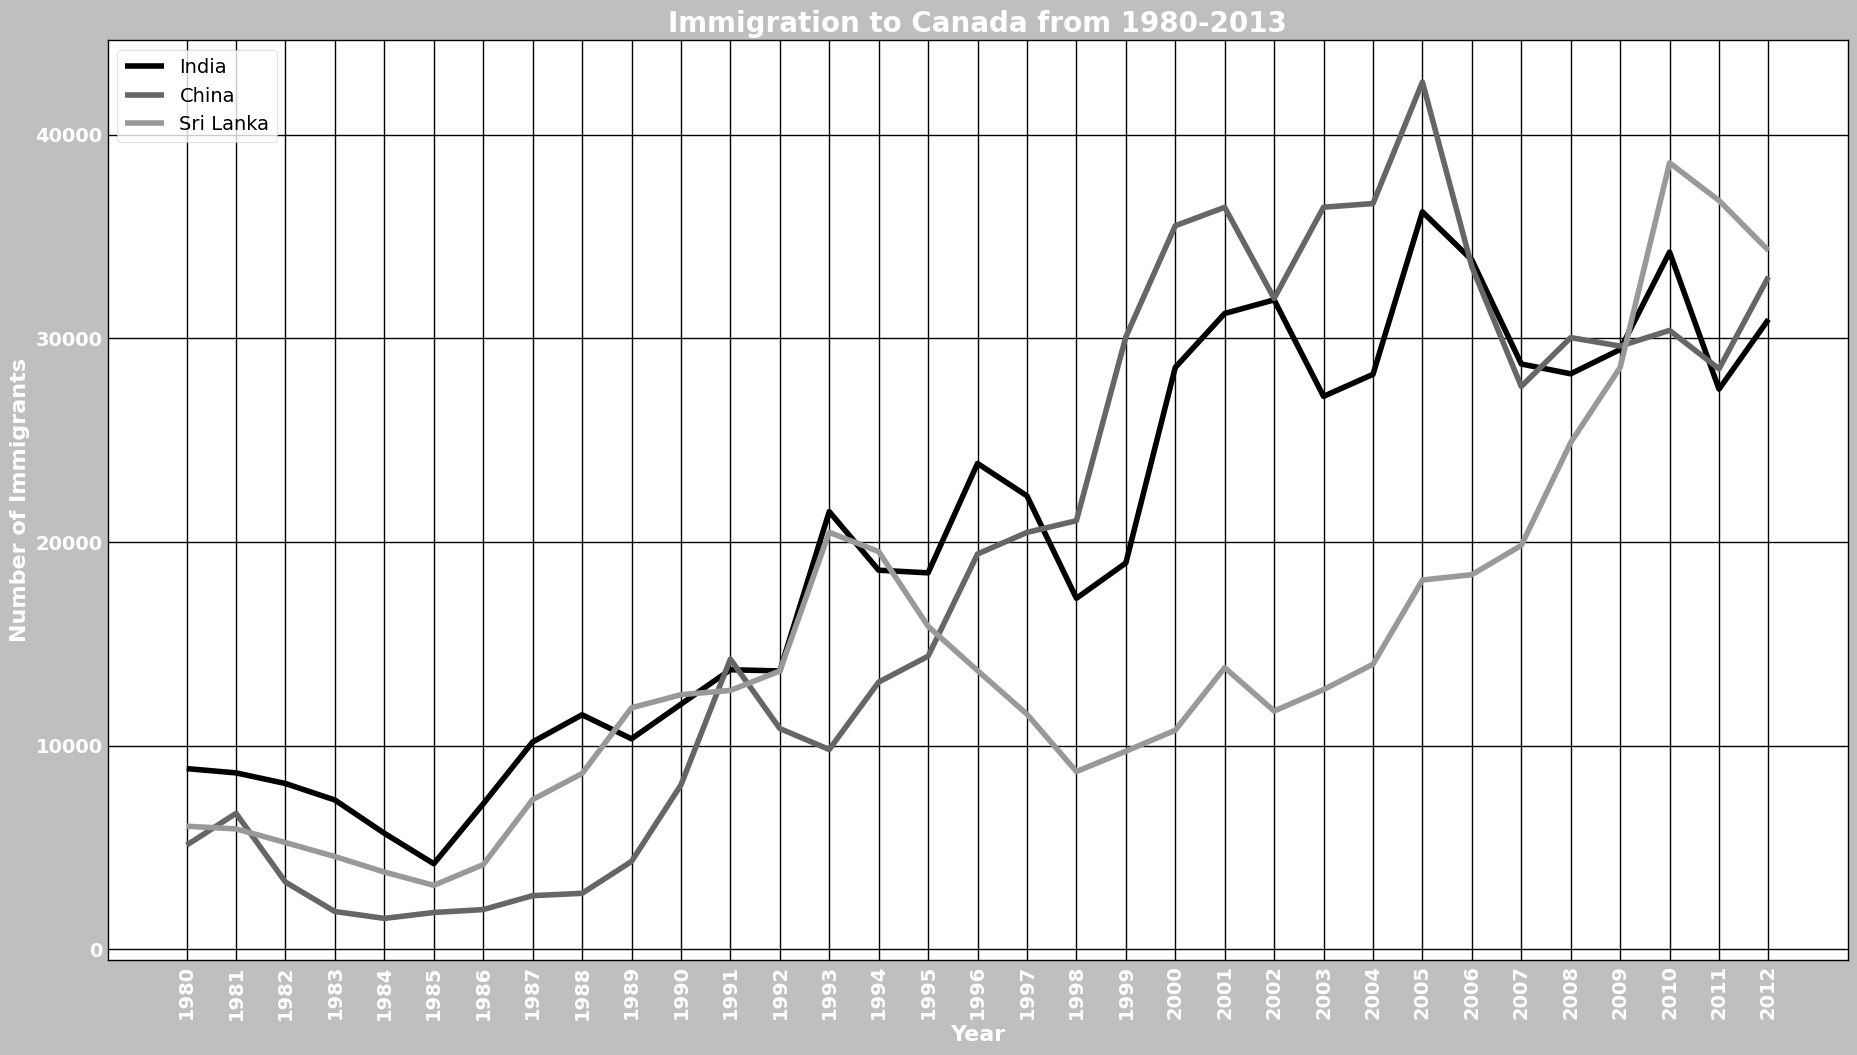

In [32]:
# Cyberpunk Multiple Line Chart

#import mplcyberpunk
#style.use('cyberpunk')

#style.use('fivethirtyeight')

plt.plot(df.loc['India',years], label = 'India')
plt.plot(df.loc['China',years], label = 'China')
plt.plot(df.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(rotation = 90, color = 'white', fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight = 'bold')
plt.title('Immigration to Canada from 1980-2013',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',color = 'white', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Immigrants',color = 'white',fontsize = 16, fontweight = 'bold')
plt.savefig('cyber_line.png')

plt.show()

#### Bar Chart

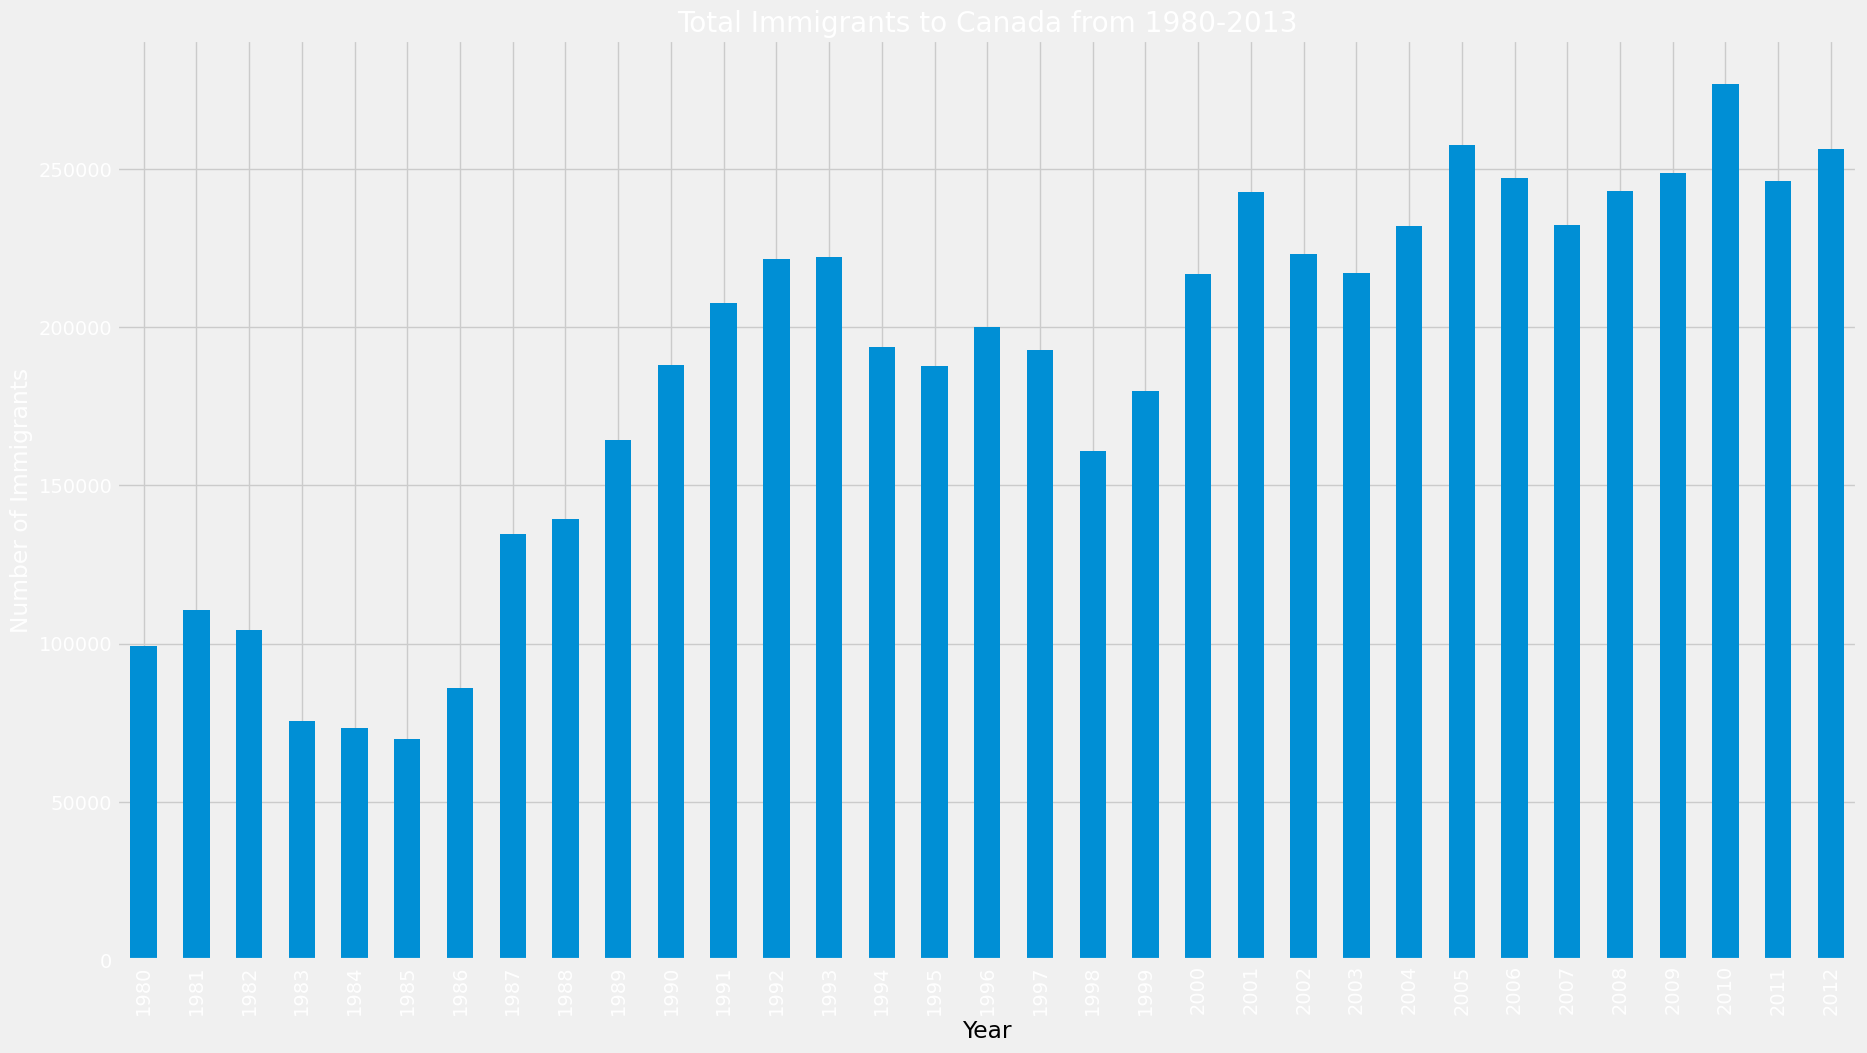

In [33]:
# Vertical bar chart
# Do not change the style back to ggplot
# delete the style.use('ggplot') line of code

# Vertical
#style.use('ggplot') #comment is the same as delete
style.use('fivethirtyeight')

df_tot = pd.DataFrame(df.loc[:,years].sum())
df_tot.rename(columns = {0:'total'}, inplace = True)

df_tot.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'white')
plt.savefig('bar_vertical.png')

plt.show()

Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

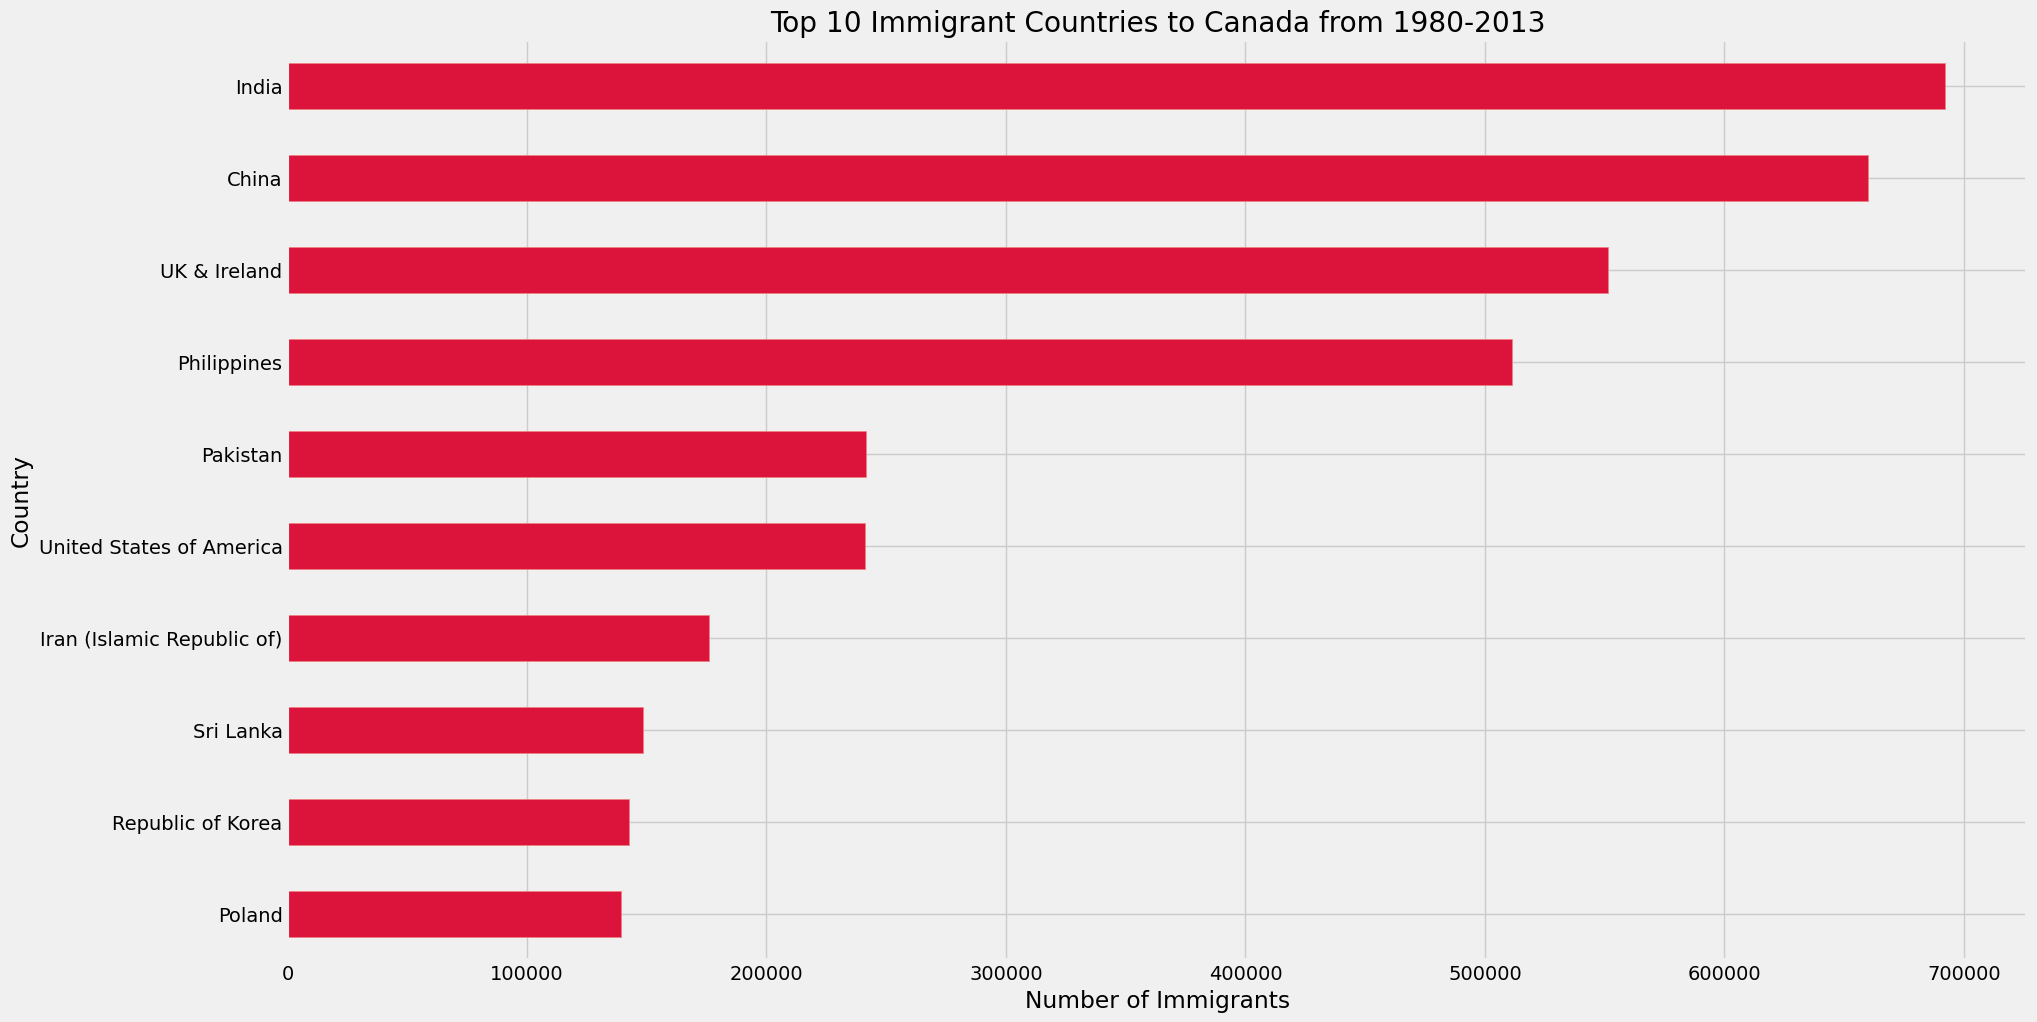

In [34]:
# Horizontal bar chart
#change style back to ggplt

df_top10 = pd.DataFrame(df.nlargest(10,'total')['total'].sort_values(ascending = True))

df_top10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

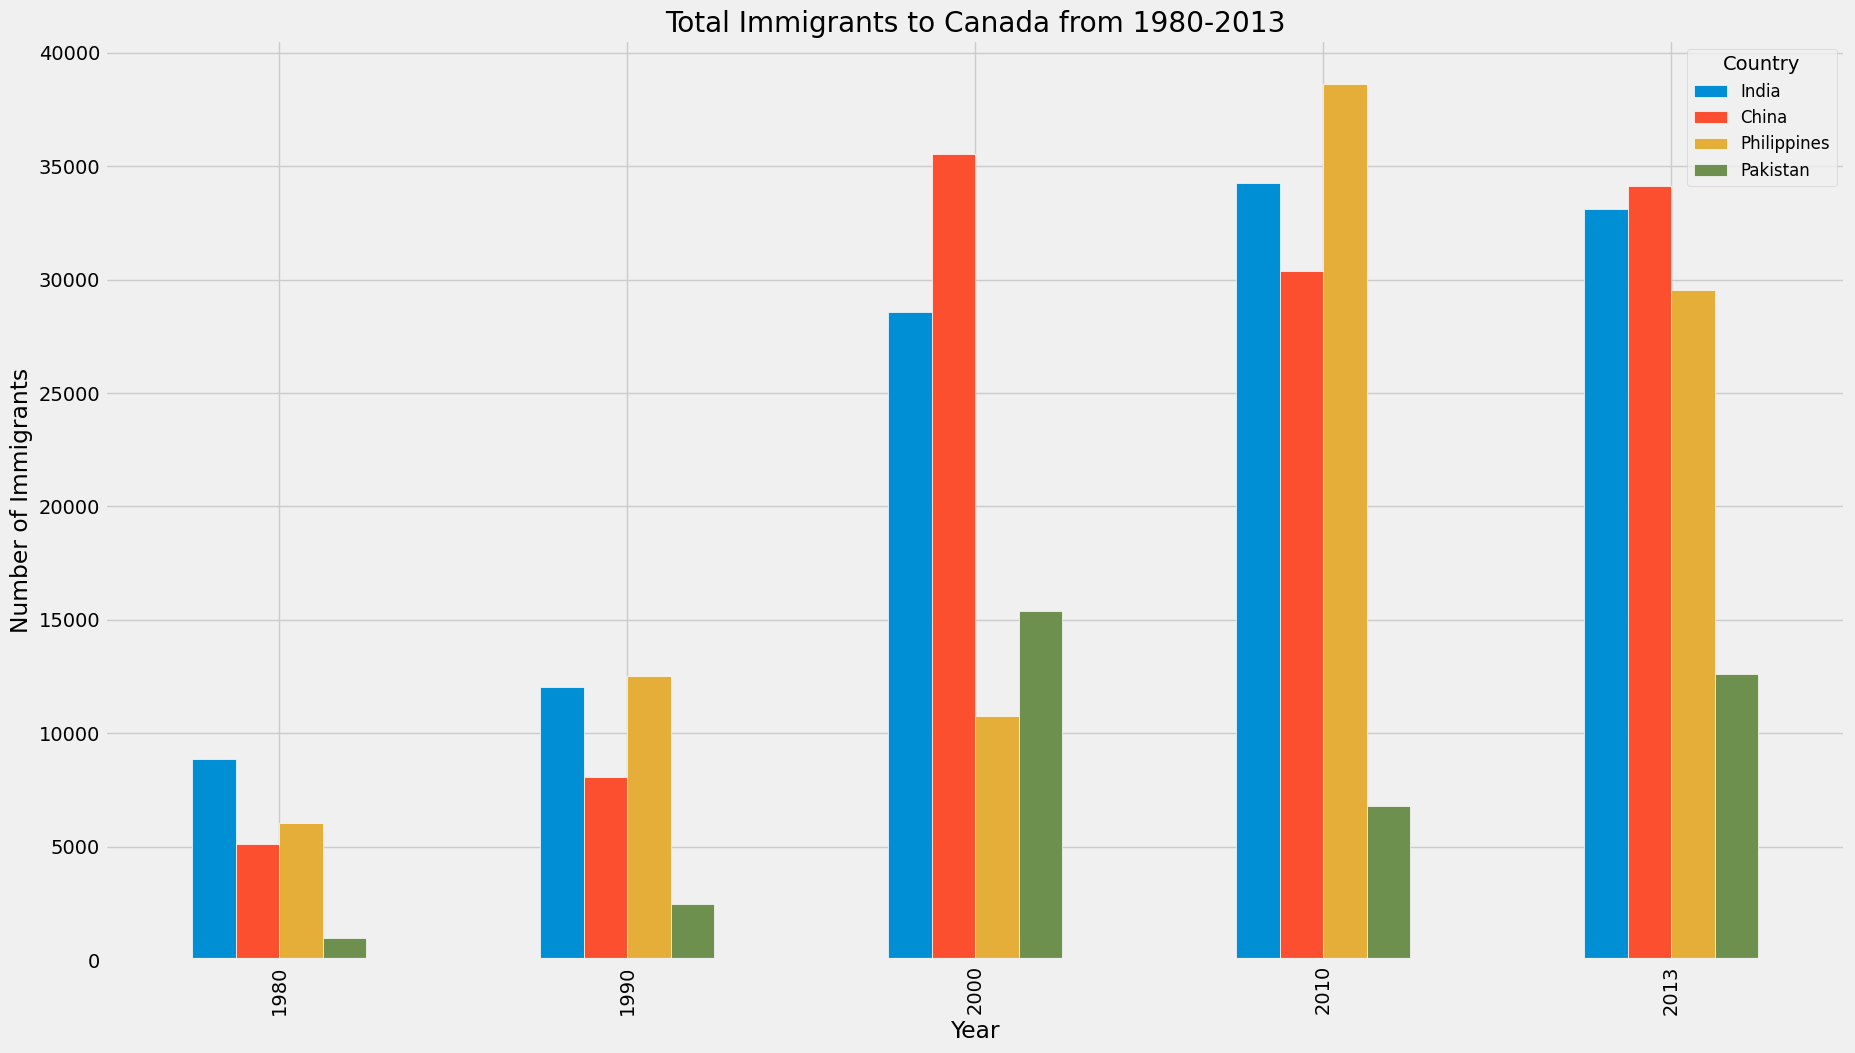

In [35]:
# Grouped bar chart

year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
df_group = pd.DataFrame(df.loc[['India','China','Philippines','Pakistan'],year_int10].T)

df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')

plt.show()

Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Area Chart

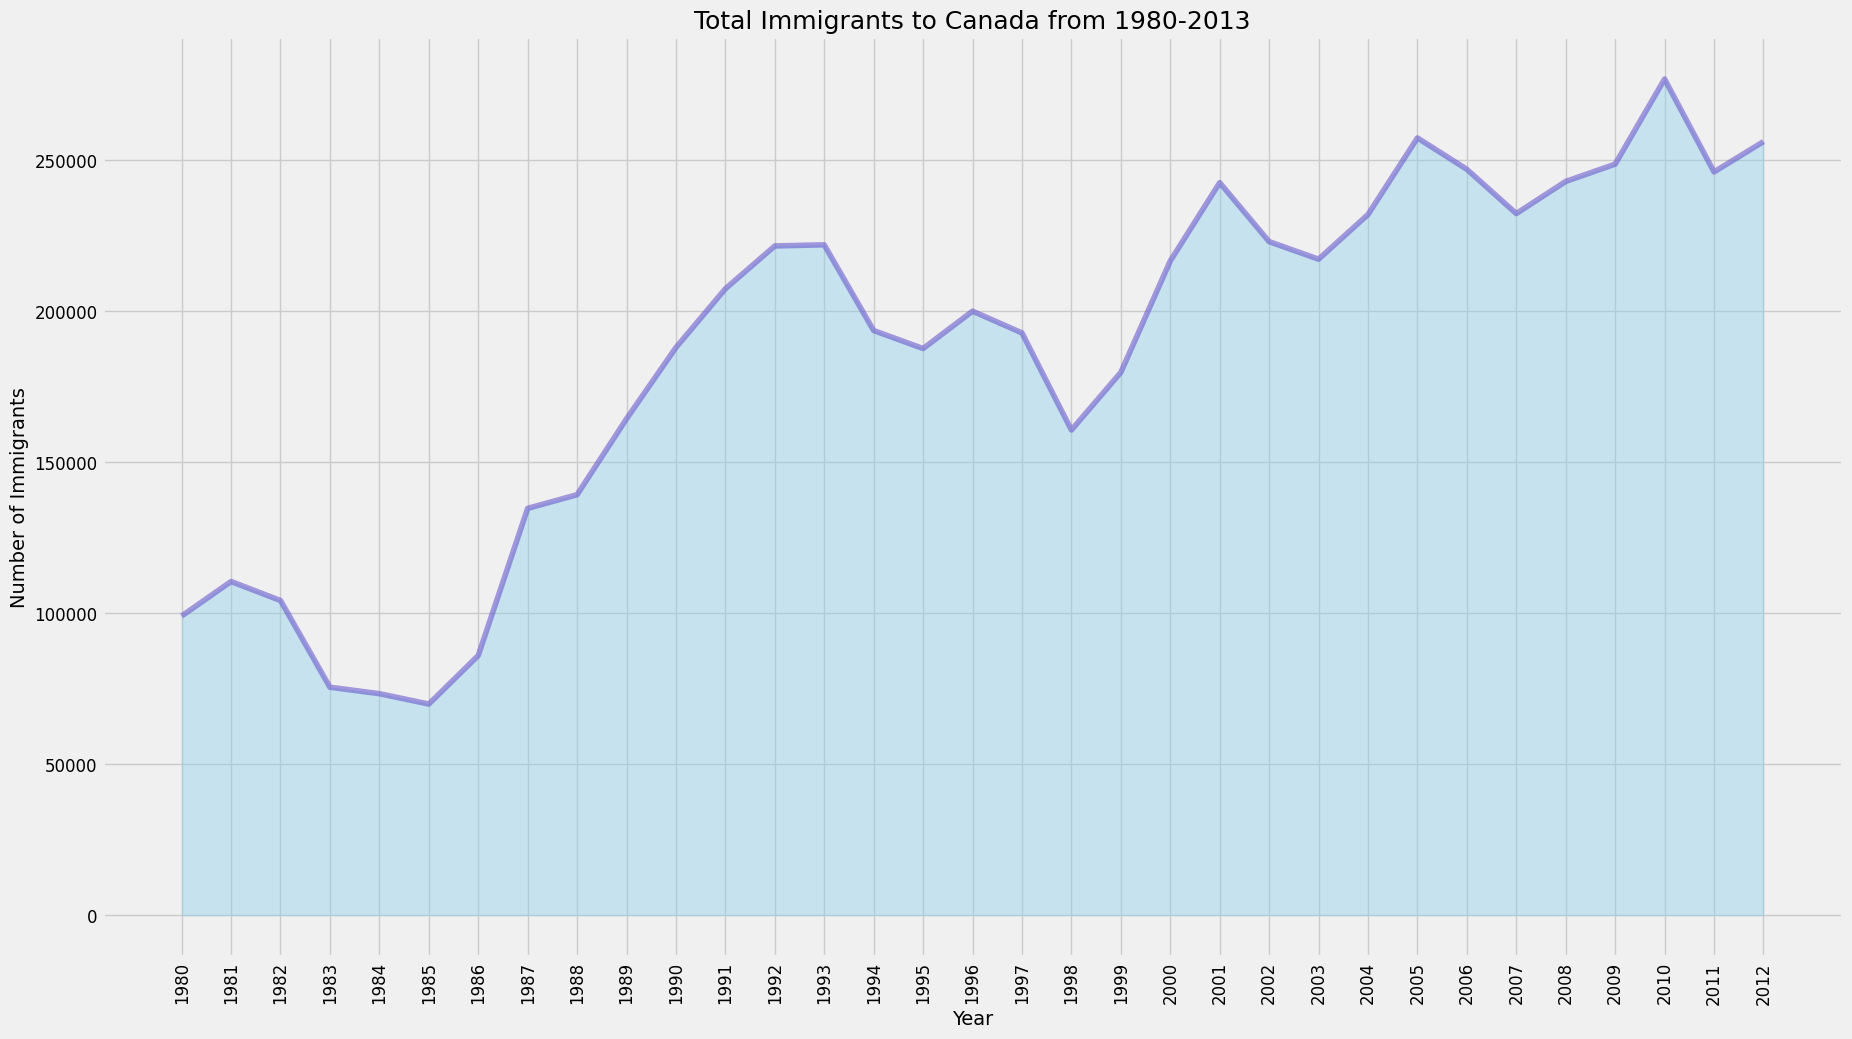

In [36]:
# Area Chart
# simple area chart

plt.fill_between(df_tot.index, df_tot['total'], color="skyblue", alpha=0.4)
plt.plot(df_tot.index, df_tot['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

NameError: ignored

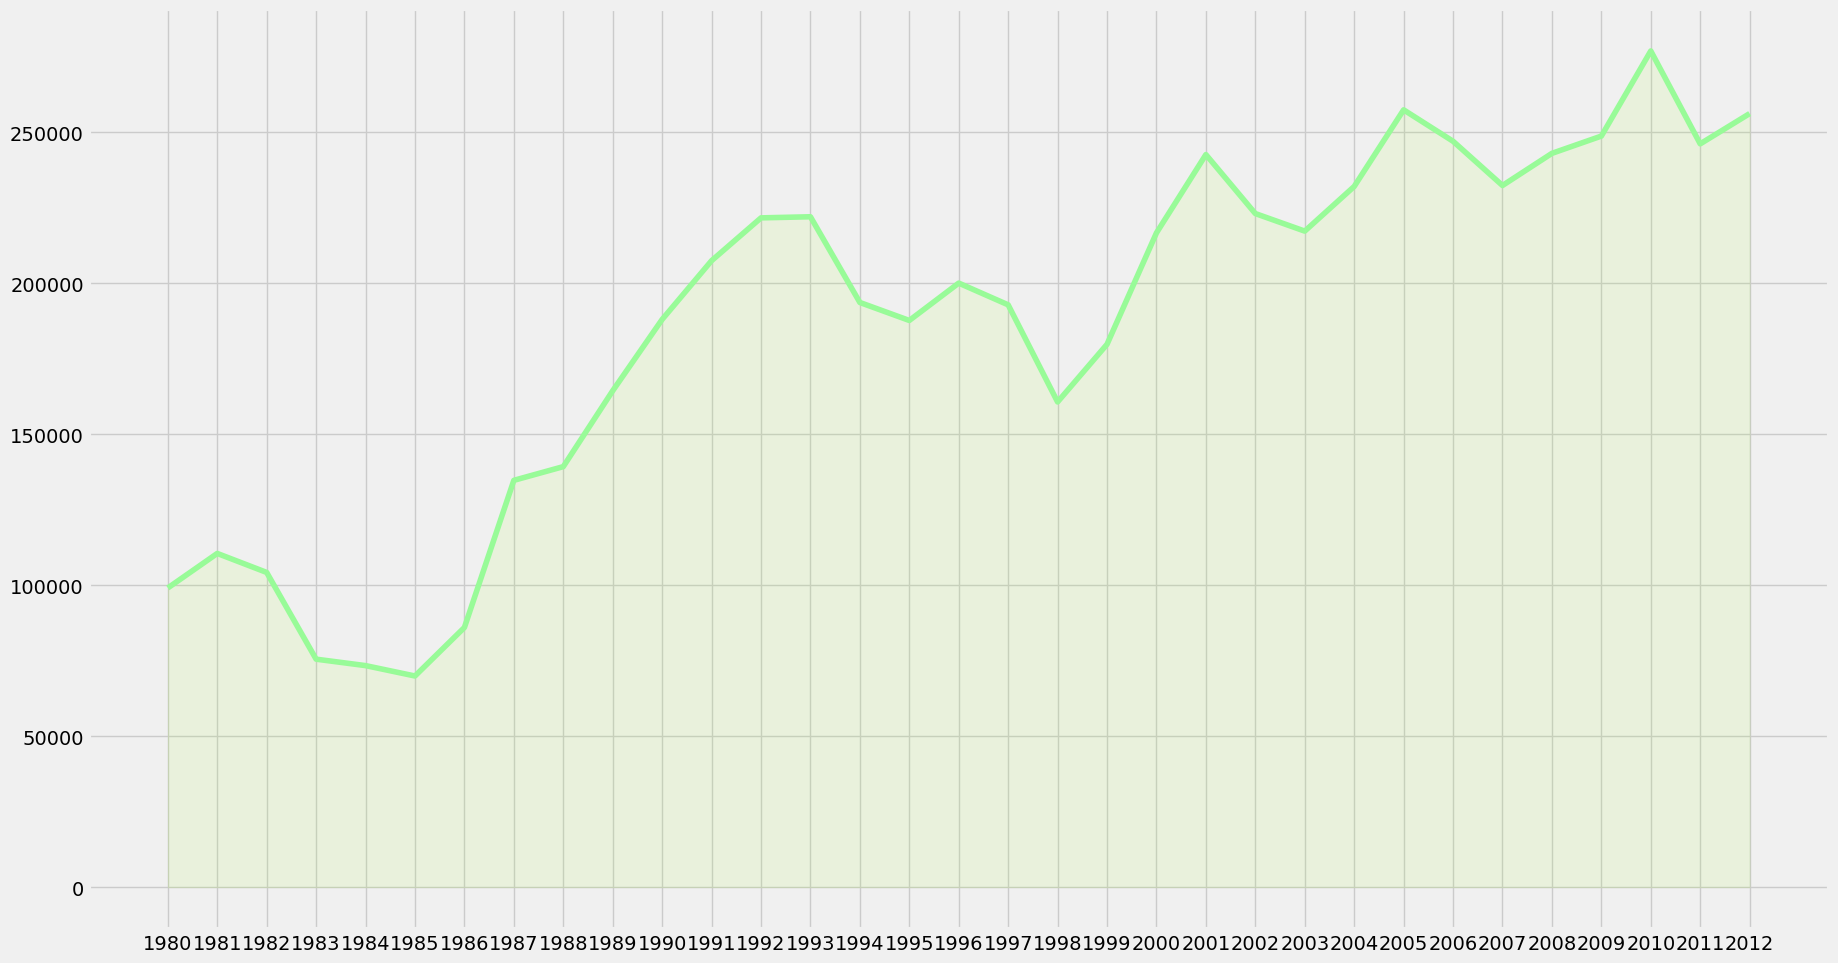

In [39]:
# cyberpunk simple area chart
#import mplcyberpunk

#style.use('cyberpunk')

plt.fill_between(df_tot.index, df_tot['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(df_tot.index, df_tot['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
# stacked area chart

df_stacked =

categories_to_stack = ['category1', 'category2', ..., 'categoryN']
df_stacked_cumsum = df_stacked[categories_to_stack].cumsum(axis=1)
plt.stackplot(df_stacked['year'], df_stacked_cumsum.T, labels=categories_to_stack, alpha=0.6)


plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.legend(loc='upper left', fontsize=12)
plt.savefig('stacked_area_chart.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
# unstacked area chart


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

In [ ]:
# Vertical Box Plot


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
# horizontal box plot


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

In [ ]:
#scatter plot comparing sepal length to sepal width


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

In [ ]:
#Histogram side by side, with kde


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

In [ ]:
# Bubble Plot


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error.

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

In [ ]:
# Doughnut Chart


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

In [ ]:
# Strong trend


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
# Weak trend


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

In [ ]:
# word cloud
from wordcloud import WordCloud, STOPWORDS


ModuleNotFoundError: No module named 'wordcloud'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

In [ ]:
# Lollipop chart


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>